In [2]:
import wave

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import pi


import IPython.display as ipd
import librosa
import librosa.display
import soundfile as sf

##### Importing .wav audio file

In [12]:
ipd.Audio("flowing_water.wav")

In [13]:
y, sr = librosa.load("flowing_water.wav")
# y.reshape(1,y.shape[0])

##### Resampling audio by randomly choosing some points from the signal

In [14]:
points=np.random.randint(1,len(y)-1,size=int(len(y)/5))
points.sort()
points[:10]

array([25, 32, 38, 44, 53, 60, 61, 66, 72, 76])

In [15]:
sf.write("test.wav", np.array([y[i] if i not in points else 0 for i in range(len(y))]), sr, subtype='PCM_24')
ipd.Audio("test.wav")

### Linear Model

In [16]:
def linear_interpolate(arr):
    x=arr.copy()
    for i in range(len(x)):
        if i in points:
            # print(i)
            l=x[i-1]
            cnt=0
            j=i
            while(j in points):
                j+=1
                cnt+=1
            # print(x[j]," ",x[i-1]," ",cnt)
            slp = (x[j]-x[i-1])/(cnt+1)
            x[i] = x[i-1]+slp
    return x

In [17]:
y_linear = linear_interpolate(y)

In [18]:
y_linear

array([5.6013166e-10, 7.4645884e-10, 5.3529264e-10, ..., 8.9524151e-04,
       2.0833185e-03, 2.7017302e-03], dtype=float32)

In [19]:
sf.write("flowing_water_linear_intp.wav", y_linear, sr, subtype='PCM_24')
ipd.Audio("flowing_water_linear_intp.wav")

### Mean of Neighbouring samples over a window

In [20]:
def mean_sampling(arr,win_len):
    x=arr.copy()
    for i in range(len(x)):            
        if i in points:
            sm=0
            cnt=0
            j=i-1
            while(i-j<=win_len and j>0):
                if j not in points:
                    sm+=x[j]
                    cnt+=1
                j-=1
            
            j=i+1
            while(j-i<=win_len and j<len(x)):
                if j not in points:
                    sm+=x[j]
                    cnt+=1
                j+=1
        
            x[i] = sm/cnt
    
    return x

In [25]:
y_mean = mean_sampling(y, 10)

In [26]:
sf.write("flowing_water_mean_winlen10.wav", y_mean, sr, subtype='PCM_24')
ipd.Audio("flowing_water_mean_winlen10.wav")

In [24]:
ipd.Audio("flowing_water_mean_winlen20.wav")

### Weighted mean ( Gaussian weight )

In [27]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [28]:
def gaussian_wt_avg(arr,win,sd):
    x = arr.copy()
    g_win = [normpdf(i,0,sd) for i in range(-win,win+1)]
    # plt.plot([i for i in range(1+win*2)],g_win)
    # plt.plot()
    for i in range(len(x)):
        temp=0
        cnt = 0
        if i in points:
            for j in range(i-win,i+win+1):
                if(j<0 or j>=len(x) or j in points):
                    continue
                else:
                    temp+=x[j]*g_win[j+win-i]
                    cnt+=g_win[j+win-i]
            x[i]=temp/cnt
    return x

In [29]:
Y_gaussian_wt_avg = gaussian_wt_avg(y,5,1)

In [30]:
sf.write("flowing_water_gaussian_wt_avg.wav", Y_gaussian_wt_avg, sr, subtype='PCM_24')
ipd.Audio("flowing_water_gaussian_wt_avg.wav")

In [31]:
Y_gaussian_winlen10 = gaussian_wt_avg(y,10,2)

In [32]:
sf.write("flowing_water_gaussian_winlen10.wav", Y_gaussian_winlen10, sr, subtype='PCM_24')
ipd.Audio("flowing_water_gaussian_winlen10.wav")

<Axes: title={'center': 'Wt. Average'}>

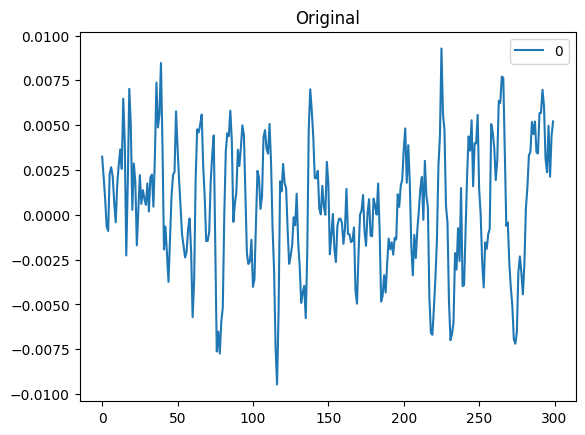

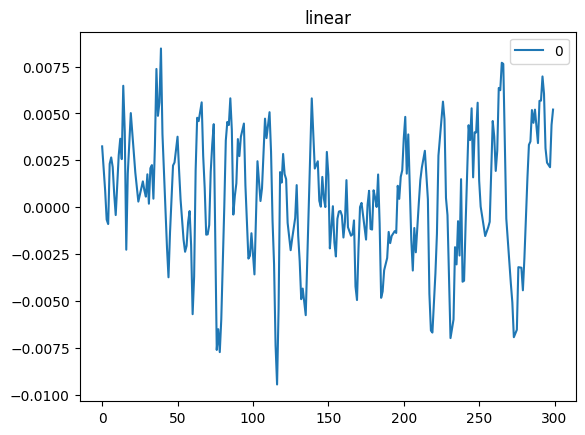

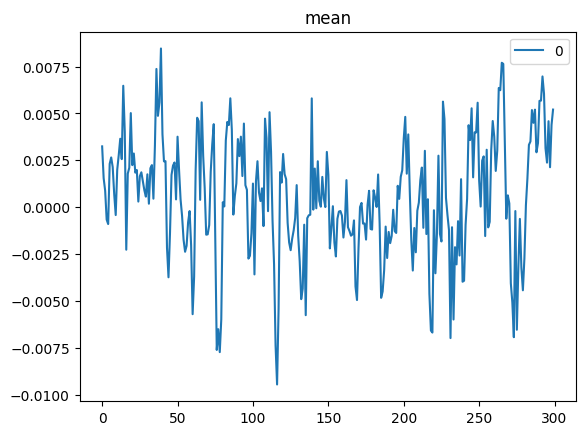

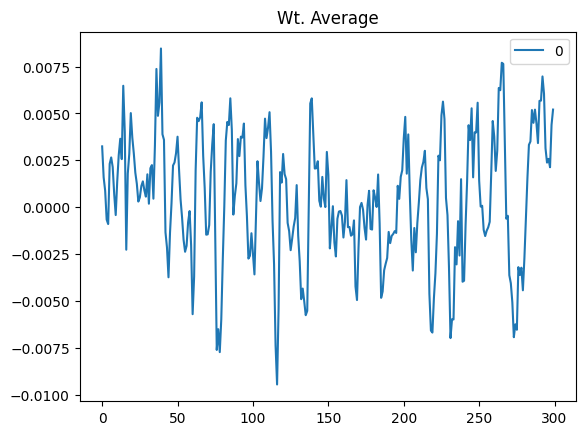

In [33]:
pd.DataFrame(y[3500:3800]).plot(title="Original")
pd.DataFrame(y_linear[3500:3800]).plot(title="linear")
pd.DataFrame(y_mean[3500:3800]).plot(title="mean")
pd.DataFrame(Y_gaussian_wt_avg[3500:3800]).plot(title="Wt. Average")

In [42]:
p = linear_interpolate([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
p

10
14   9   4
11
14   10.0   3
12
14   11.0   2
13
14   12.0   1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.0, 11.0, 12.0, 13.0, 14, 15]